## TODO: download the MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

In [17]:
import utils
import layers

In [23]:
import importlib
importlib.reload(utils)
importlib.reload(layers)

<module 'layers' from '/home/joe/Documents/semester-6/pattern-recognition/ann/layers.py'>

## Load Data

In [35]:
# adding color channels to mnist dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1))  # Convert [1, 28, 28] → [3, 28, 28]
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

## Data Preview

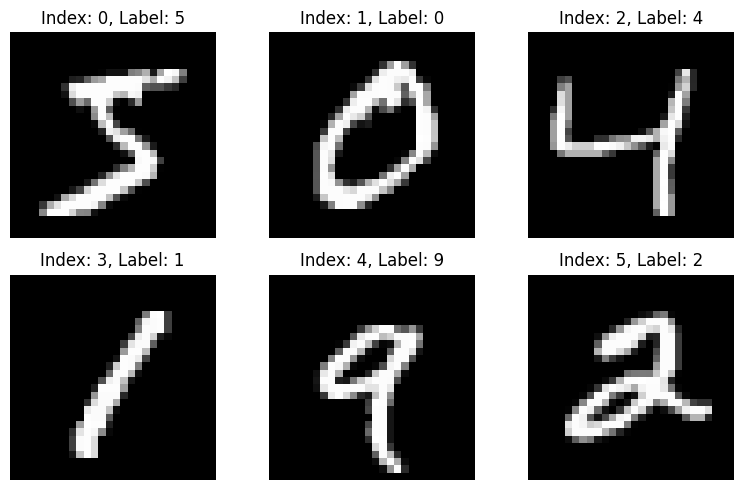

In [36]:
# Set up a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(8, 5))

for i in range(6):
    image, label = train_dataset[i]
    tmp_img = image.permute(1, 2, 0)
    
    ax = axes[i // 3, i % 3]  # Convert index to 2D grid position
    ax.imshow(tmp_img)
    ax.set_title(f"Index: {i}, Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## Build Neural Network

In [51]:
class ann:
    def __init__(self):
        self.conv1 = layers.Conv2D(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = layers.Conv2D(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        self.fc1 = layers.Dense(input_size=32 * 7 * 7, output_size=128)
        self.fc2 = layers.Dense(input_size=128, output_size=10)

        self.maxPool1 = layers.MaxPool2D(kernel_size=2, stride=2)
        self.maxPool2 = layers.MaxPool2D(kernel_size=2, stride=2)
        
        self.flatten = layers.Flatten()

    def forward(self, x):
        x = utils.relu(self.conv1.forward(x))
        
        x = self.maxPool1.forward(x)

        x = utils.relu(self.conv2.forward(x))
        
        x = self.maxPool2.forward(x)

        x = self.flatten.forward(x)

        x = utils.relu(self.fc1.forward(x))

        x = self.fc2.forward(x)

        return np.argmax(x, axis=1) + 1

In [55]:
image, label = train_dataset[4]

network = ann()
predicted_y = network.forward(image.unsqueeze(0))
print(predicted_y)

[7]


## Training

In [ ]:
# use layers and utils to start training the neural network